In [1]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [2]:
filenames = next(walk('/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/gt/'), (None, None, []))[2]

In [3]:
filenames

['P11802.npy',
 'P19784.npy',
 'P24941.npy',
 'P50750.npy',
 'Q16539.npy',
 'P67870.npy',
 'P06493.npy',
 'P17612.npy',
 'P68400.npy',
 'P28482.npy',
 'Q00535.npy',
 'P27361.npy',
 'O43741.npy']

In [4]:
def getCmaps(file,path):
    gt=np.load(path+'gt/'+file)
    esm=np.load(path+'esm_cmaps/'+file)
    alpha=np.load(path+'alpha_fold_cmaps/'+file)
    pcons=np.load(path+'pconsc4/'+file)
    pcons=pcons >= 0.5
    pcons=np.multiply(pcons,1)
    #rand=np.load(path+'esm/'+file)
    rand=np.load(path+'rand_cmaps/'+file)
    return gt,alpha,esm,pcons,rand

In [114]:
gt,alpha,esm,pcons,rand=getCmaps('P19784.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')

In [94]:
def comparision_contactMaps1(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()
#     title_text='Comparative Analysis of Contact Maps - %s'%(file)
#     fig.suptitle(title_text, fontsize=11,fontweight='bold')
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
    #fig.suptitle(title_text, fontsize=14,fontweight='bold')
    
   
    
    G=gt
    
    #AlphaFold
    P=alpha
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)
    ax[0].set_aspect('equal', adjustable='box')
    #ax[0].title.set_text('AlphaFold2')
    ax[0].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[0].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="Contact Gain")
#
   #025794
    ax[1].set_aspect('equal', adjustable='box')
    #ax[1].title.set_text('Pconcs4')
    
    #Pconcs4
    P=pcons
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)

    ax[1].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[1].scatter(x_indices[:, 0], x_indices[:, 1], color='#8F5900', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[1].scatter(y_indices[:, 0], y_indices[:, 1], color='#21488F', s=30,marker='s', alpha=0.6,label="Contact Gain")
    
    #ESM
    ax[2].set_aspect('equal', adjustable='box')
    P=esm
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)

    ax[2].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[2].scatter(x_indices[:, 0], x_indices[:, 1], color="#ffa300", s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[2].scatter(y_indices[:, 0], y_indices[:, 1], color="#9b19f5", s=30,marker='s', alpha=0.6,label="Contact Gain")
    
    
    #Random
    ax[3].set_aspect('equal', adjustable='box')
    P=rand
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)
 
    #ax[3].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
#     ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color="#ffa300", s=20,marker="x", alpha=0.6,label="Contact Lost")
#     ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color="#9b19f5", s=20,marker='s', alpha=0.6,label="Contact Gain")
    
    ax[3].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color='#2F8B8E', s=30,marker='s', alpha=0.6,label="Contact Gain")

   
    ax[3].set_aspect('equal', adjustable='box')
    #ax[3].title.set_text('Random')



    #ax[3].legend(loc='upper right',bbox_to_anchor=(1.59,0.65))
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))
    handles, labels = ax[3].get_legend_handles_labels()
    fig.legend(handles, labels, loc='right',bbox_to_anchor=(1.09, 0.5))
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    ax[2].invert_yaxis()
    ax[3].invert_yaxis()
    ax[0].set_xlabel('Amino acids')
    ax[0].set_ylabel('Amino acids')
    ax[1].set_xlabel('Amino acids')
    ax[1].set_ylabel('Amino acids')
    ax[2].set_xlabel('Amino acids')
    ax[2].set_ylabel('Amino acids')
    ax[3].set_xlabel('Amino acids')
    ax[3].set_ylabel('Amino acids')
    fig.tight_layout()
    final_result_path=results_path+file[:-4]+"_cmaps_"+".pdf"
    final_result_path1=results_path+file[:-4]+"_cmaps_"+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

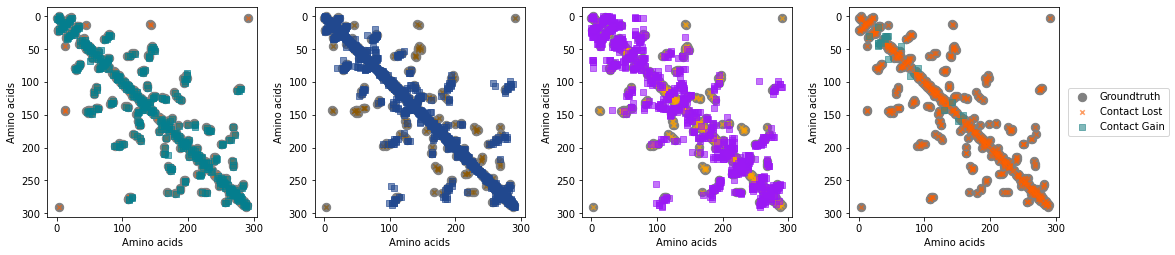

In [95]:
comparision_contactMaps1(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results1/",'Q00535.npy')

In [112]:
def comparision_contactMaps(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()
#     title_text='Comparative Analysis of Contact Maps - %s'%(file)
#     fig.suptitle(title_text, fontsize=11,fontweight='bold')
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
    #fig.suptitle(title_text, fontsize=14,fontweight='bold')
    
   
    
    G=gt
    
    #AlphaFold
    ax[0].set_aspect('equal', adjustable='box')
    P=alpha
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)
    
    #ax[0].title.set_text('AlphaFold2')
    ax[0].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[0].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="Contact Gain")
##047F8F
   
    ax[1].set_aspect('equal', adjustable='box')
    #ax[1].title.set_text('Pconcs4')
    
    #Pconcs4
    P=pcons
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)

    ax[1].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[1].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[1].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="Contact Gain")
    
    #ESM
    ax[2].set_aspect('equal', adjustable='box')
    P=esm
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)

    ax[2].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[2].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[2].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="Contact Gain")
    
    
    #Random
    ax[3].set_aspect('equal', adjustable='box')
    P=rand
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    g_indices=np.argwhere(G == 1)
 
    #ax[3].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
#     ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color="#ffa300", s=20,marker="x", alpha=0.6,label="Contact Lost")
#     ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color="#9b19f5", s=20,marker='s', alpha=0.6,label="Contact Gain")
    
    ax[3].scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1,label="Groundtruth")
    ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color='#FD5F00', s=20,marker="x", alpha=0.6,label="Contact Lost")
    ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="Contact Gain")

   
    
    #ax[3].title.set_text('Random')



    #ax[3].legend(loc='upper right',bbox_to_anchor=(1.59,0.65))
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))
    handles, labels = ax[3].get_legend_handles_labels()
    fig.legend(handles, labels, loc='right',bbox_to_anchor=(1.1, 0.5))
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    ax[2].invert_yaxis()
    ax[3].invert_yaxis()
    ax[0].set_xlabel('Amino acids')
    ax[0].set_ylabel('Amino acids')
    ax[1].set_xlabel('Amino acids')
    ax[1].set_ylabel('Amino acids')
    ax[2].set_xlabel('Amino acids')
    ax[2].set_ylabel('Amino acids')
    ax[3].set_xlabel('Amino acids')
    ax[3].set_ylabel('Amino acids')
    

    ax[0].set_xticks(range(0,gt.shape[0], 50))
    ax[0].set_yticks(range(0,gt.shape[0], 50))
    ax[1].set_xticks(range(0,gt.shape[0], 50))
    ax[1].set_yticks(range(0,gt.shape[0], 50))
    ax[2].set_xticks(range(0,gt.shape[0], 50))
    ax[2].set_yticks(range(0,gt.shape[0], 50))
    ax[3].set_xticks(range(0,gt.shape[0], 50))
    ax[3].set_yticks(range(0,gt.shape[0], 50))
    fig.tight_layout()
    final_result_path=results_path+file[:-4]+"_cmaps_"+".pdf"
    final_result_path1=results_path+file[:-4]+"_cmaps_"+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

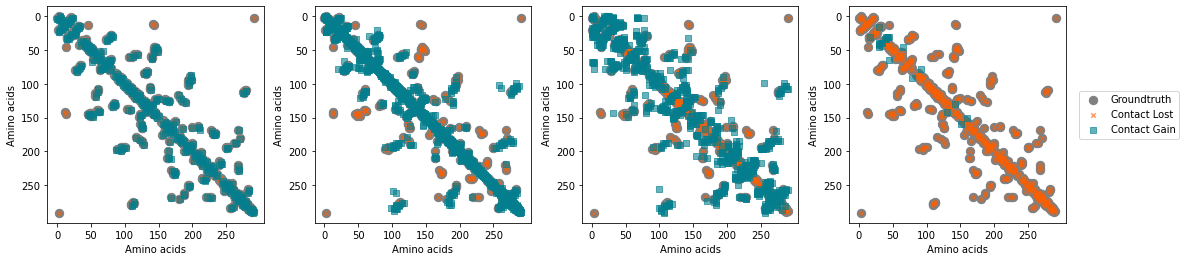

In [113]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results2/",'Q00535.npy')

<Figure size 432x288 with 0 Axes>

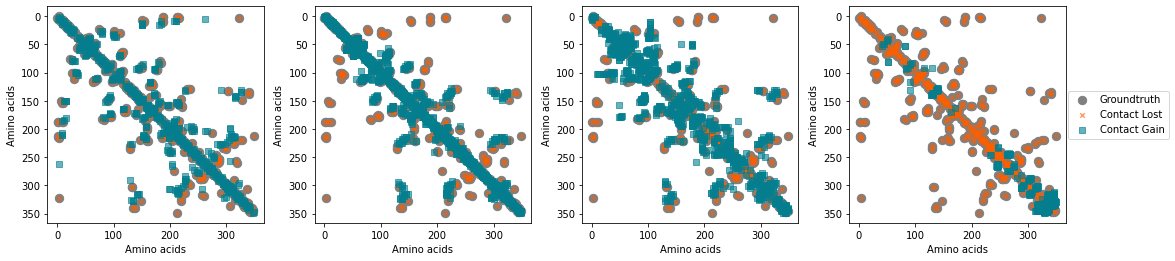

In [99]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results2/",'P19784.npy')

In [ ]:
G=gt
P=alpha
# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

# Create a scatter plot
x_indices = np.argwhere(X == 1)
y_indices = np.argwhere(Y == 1)
g_indices=np.argwhere(G == 1)
fig, ax = plt.subplots()
ax.scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1)
ax.scatter(x_indices[:, 0], x_indices[:, 1], color='green', s=20,marker="x", alpha=0.6)
ax.scatter(y_indices[:, 0], y_indices[:, 1], color='blue', s=30,marker='s', alpha=0.6)
#ax.scatter(g_indices[:,0],g_indices[:,1], color='gray', alpha=1)
#ax.imshow(G, cmap='gray', alpha=1)
plt.show()